# QUBIC +

We try to construct another hypotetical instrument, QUBIC+ which is a combination of QUBIC and Simons obervatory experiments. 

The maps of S4 have these parameters :

$$\nu_i \hspace{1cm} \Delta \nu_i \hspace{1cm} \sigma_i$$

with $\nu$ is the frequency, $\Delta \nu$ is the bandwidth and $\sigma$ is the RMS of noise maps. The index $i$ is the sub-band of the observations. We consider now QUBIC+ with those parameters :

$$\nu_i \times n \hspace{1cm} \frac{\Delta \nu_i}{n} \hspace{1cm} \sigma_i \times \frac{\sqrt{n} \times (1 + \epsilon)}{f}$$

with $n$ the number of reconstruted sub-bands. $\epsilon$ is the relative optimality because of bolometric interferometry, $f$ is the fraction of CMB-S4 sensitivity and goes from $ \sqrt{n} \times (1 + \epsilon)$ to $1$.

In [1]:
import qubicplus
import CMBS4
import pysm3
import pysm3.units as u
from pysm3 import utils
import numpy as np
from qubic import camb_interface as qc
import healpy as hp
import matplotlib.pyplot as plt
import os
import random as rd
import string
import qubic
from importlib import reload
import pickle

plt.rc('figure',figsize=(16,4))
plt.rc('font',size=12)

center = qubic.equ2gal(0, -57)
# If there is not this command, the kernel shut down every time..
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

/Users/mathiasregnier/miniconda3/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(


<Figure size 1152x288 with 0 Axes>

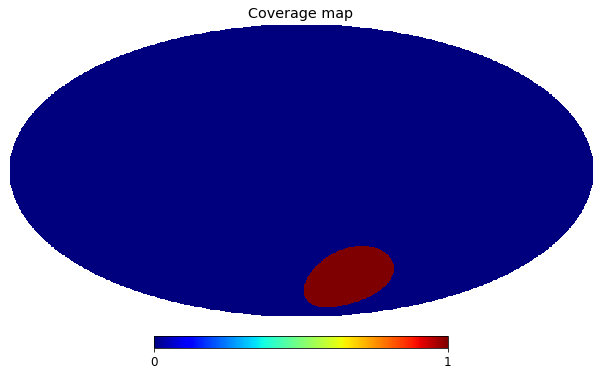

In [2]:
nside=256

def get_coverage(fsky, nside, center_radec=[0., -57.]):
    center = qubic.equ2gal(center_radec[0], center_radec[1])
    uvcenter = np.array(hp.ang2vec(center[0], center[1], lonlat=True))
    uvpix = np.array(hp.pix2vec(nside, np.arange(12*nside**2)))
    ang = np.arccos(np.dot(uvcenter, uvpix))
    indices = np.argsort(ang)
    okpix = ang < -1
    okpix[indices[0:int(fsky * 12*nside**2)]] = True
    mask = np.zeros(12*nside**2)
    mask[okpix] = 1
    return mask

covmap = get_coverage(0.03, nside)
skyconfig = {'cmb':42, 'dust':'d0'}

thr = 0.1
mymask = (covmap > (np.max(covmap)*thr)).astype(int)
pixok = mymask > 0

plt.figure()
hp.mollview(covmap, title = 'Coverage map', cmap='jet')
plt.show()

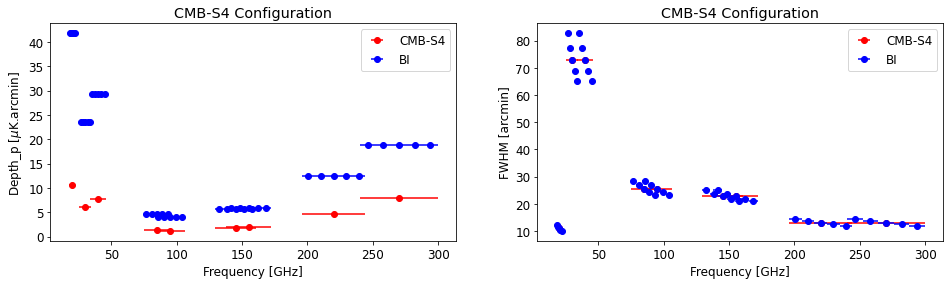

In [3]:
# Loading of dictionary from BI-CMBS4.ipynb 

pkl_file = open('S4_dict.pkl', 'rb')
S4_dict = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('BI_dict.pkl', 'rb')
BI_dict = pickle.load(pkl_file)
pkl_file.close()

plt.figure()
plt.subplot(1,2,1)
plt.errorbar(S4_dict['frequency'], S4_dict['depth_p'], xerr=S4_dict['bandwidth']/2, fmt='ro', label='CMB-S4')
plt.errorbar(BI_dict['frequency'], BI_dict['depth_p'], xerr=BI_dict['bandwidth']/2, fmt='bo', label='BI')
plt.xlabel('Frequency [GHz]')
plt.ylabel(r'Depth_p [$\mu$K.arcmin]')
plt.title('CMB-S4 Configuration')
plt.legend()
plt.subplot(1,2,2)
plt.errorbar(S4_dict['frequency'], S4_dict['fwhm'], xerr=S4_dict['bandwidth']/2, fmt='ro', label='CMB-S4')
plt.errorbar(BI_dict['frequency'], BI_dict['fwhm'], xerr=BI_dict['bandwidth']/2, fmt='bo', label='BI')
plt.xlabel('Frequency [GHz]')
plt.ylabel('FWHM [arcmin]')
plt.title('CMB-S4 Configuration')
plt.legend()
plt.show()

In [5]:
reload(CMBS4)
reload(qubicplus)

qp=qubicplus.QUBICplus(skyconfig, BI_dict)

mapQUBICplus_noisy, mapQUBICplus_noiseless, noiseQUBICplus = qp.getskymaps(same_resol=None, 
                                                                           iib=False, 
                                                                           verbose=True, 
                                                                           coverage=covmap, 
                                                                           noise=True, 
                                                                           signoise=20.)

/Users/mathiasregnier/miniconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:197: FutureWarning: The default dtype of write_map() will change in a future version: explicitly set the dtype if it is important to you
  warnings.warn(
/Users/mathiasregnier/miniconda3/lib/python3.8/site-packages/pysm3/utils/data.py:37: UserWarning: Access data from /tmp/dFjVpjykQy
  warnings.warn(f"Access data from {full_path}")
/Users/mathiasregnier/miniconda3/lib/python3.8/site-packages/pysm3/utils/data.py:42: UserWarning: Retrieve data for pysm_2/dust_t_new.fits (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")
/Users/mathiasregnier/miniconda3/lib/python3.8/site-packages/pysm3/utils/data.py:42: UserWarning: Retrieve data for pysm_2/dust_q_new.fits (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")
/Users/mathiasregnier/miniconda3/lib/python3.8/site-packages/pysm3/utils/data.py:42: UserWarning: Retrieve data fo

    FWHM : [0.2037037  0.19298246 0.18333333 0.17460317 0.16666667 1.37878788
 1.29078014 1.21333333 1.14465409 1.08333333 1.37878788 1.29078014
 1.21333333 1.14465409 1.08333333 0.47013274 0.44642857 0.425
 0.40553435 0.38777372 0.47013274 0.44642857 0.425      0.40553435
 0.38777372 0.41483918 0.39574616 0.37833333 0.36238825 0.34773284
 0.41483918 0.39574616 0.37833333 0.36238825 0.34773284 0.2375731
 0.22663877 0.21666667 0.20753512 0.19914216 0.2375731  0.22663877
 0.21666667 0.20753512 0.19914216] deg 
    nus : [ 18.    19.    20.    21.    22.    26.4   28.2   30.    31.8   33.6
  35.2   37.6   40.    42.4   44.8   76.84  80.92  85.    89.08  93.16
  85.88  90.44  95.    99.56 104.12 132.24 138.62 145.   151.38 157.76
 141.36 148.18 155.   161.82 168.64 200.64 210.32 220.   229.68 239.36
 246.24 258.12 270.   281.88 293.76] GHz 
    Bandwidth : [ 1.    1.    1.    1.    1.    1.8   1.8   1.8   1.8   1.8   2.4   2.4
  2.4   2.4   2.4   4.08  4.08  4.08  4.08  4.08  4.56  4.56  4

In [6]:
qp=CMBS4.S4(skyconfig, S4_dict)

mapS4_noisy, mapS4_noiseless, noiseS4 = qp.getskymaps(same_resol=None, 
                                                      iib=False, 
                                                      verbose=True, 
                                                      coverage=covmap, 
                                                      noise=True, 
                                                      signoise=20.)

/Users/mathiasregnier/miniconda3/lib/python3.8/site-packages/pysm3/utils/data.py:37: UserWarning: Access data from /tmp/SflxaWbPDO
  warnings.warn(f"Access data from {full_path}")


    FWHM : [0.18333333 1.21333333 1.21333333 0.425      0.425      0.37833333
 0.37833333 0.21666667 0.21666667] deg 
    nus : [ 20.  30.  40.  85.  95. 145. 155. 220. 270.] GHz 
    Bandwidth : [ 5.   9.  12.  20.4 22.8 31.9 34.1 48.4 59.4] GHz


Reconvolution to 0.18 deg
Reconvolution to 1.21 deg
Reconvolution to 1.21 deg
Reconvolution to 0.42 deg
Reconvolution to 0.42 deg
Reconvolution to 0.38 deg
Reconvolution to 0.38 deg
Reconvolution to 0.22 deg
Reconvolution to 0.22 deg


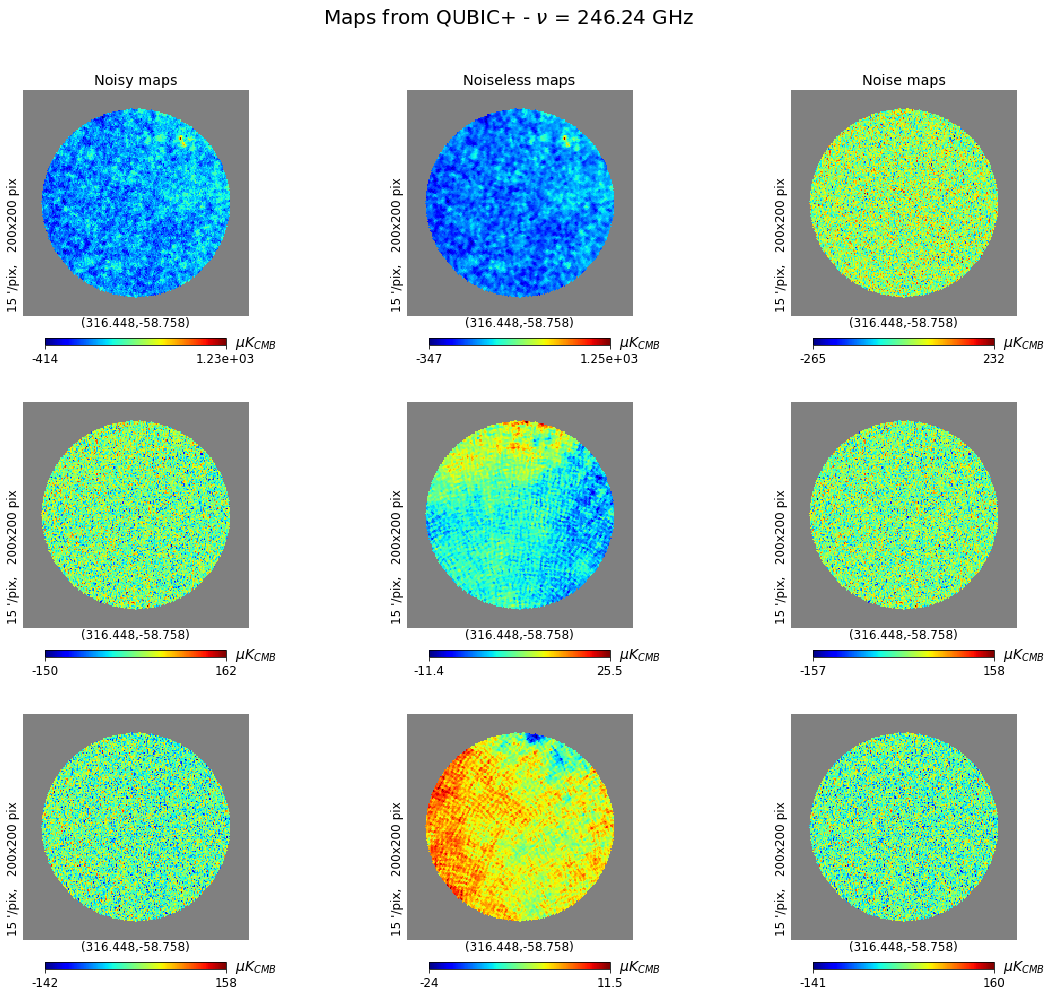

In [9]:
f=40

plt.figure(figsize=(16, 13))
hp.gnomview(mapQUBICplus_noisy[f, 0], rot=center, reso=15, cmap='jet', sub=(3, 3, 1), title='Noisy maps', 
            unit=r'$\mu K_{CMB}$')
hp.gnomview(mapQUBICplus_noiseless[f, 0], rot=center, reso=15, cmap='jet', sub=(3, 3, 2), title='Noiseless maps', 
            unit=r'$\mu K_{CMB}$')
hp.gnomview(noiseQUBICplus[f, 0], rot=center, reso=15, cmap='jet', sub=(3, 3, 3), title='Noise maps', 
            unit=r'$\mu K_{CMB}$')

hp.gnomview(mapQUBICplus_noisy[f, 1], rot=center, reso=15, cmap='jet', sub=(3, 3, 4), title='', 
            unit=r'$\mu K_{CMB}$')
hp.gnomview(mapQUBICplus_noiseless[f, 1], rot=center, reso=15, cmap='jet', sub=(3, 3, 5), title='', 
            unit=r'$\mu K_{CMB}$')
hp.gnomview(noiseQUBICplus[f, 1], rot=center, reso=15, cmap='jet', sub=(3, 3, 6), title='', 
            unit=r'$\mu K_{CMB}$')

hp.gnomview(mapQUBICplus_noisy[f, 2], rot=center, reso=15, cmap='jet', sub=(3, 3, 7), title='', 
            unit=r'$\mu K_{CMB}$')
hp.gnomview(mapQUBICplus_noiseless[f, 2], rot=center, reso=15, cmap='jet', sub=(3, 3, 8), title='', 
            unit=r'$\mu K_{CMB}$')
hp.gnomview(noiseQUBICplus[f, 2], rot=center, reso=15, cmap='jet', sub=(3, 3, 9), title='', 
            unit=r'$\mu K_{CMB}$')

plt.suptitle(r'Maps from QUBIC+ - $\nu$ = {:.2f} GHz'.format(BI_dict['frequency'][f]), fontsize=20, y=1.05)
plt.show()

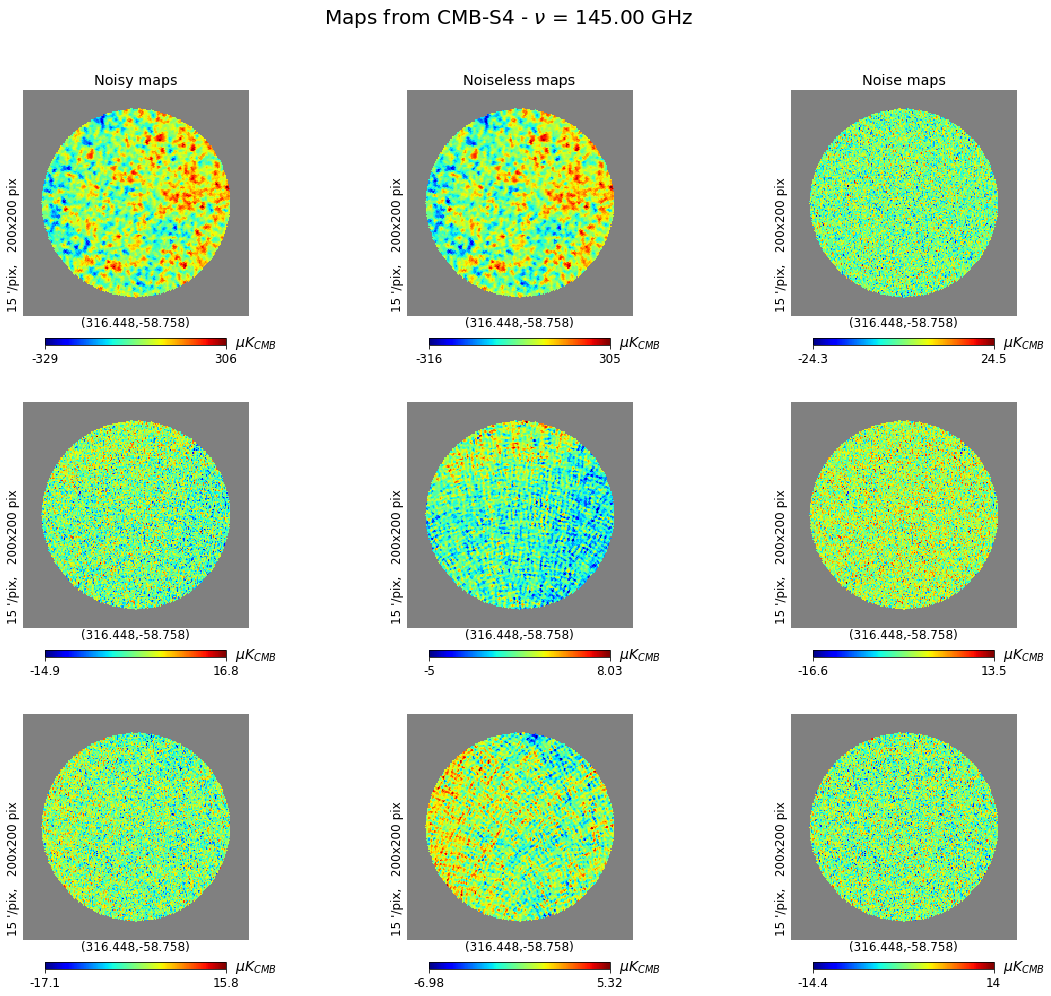

In [8]:
f=5

plt.figure(figsize=(16, 13))
hp.gnomview(mapS4_noisy[f, 0], rot=center, reso=15, cmap='jet', sub=(3, 3, 1), title='Noisy maps', 
            unit=r'$\mu K_{CMB}$')
hp.gnomview(mapS4_noiseless[f, 0], rot=center, reso=15, cmap='jet', sub=(3, 3, 2), title='Noiseless maps', 
            unit=r'$\mu K_{CMB}$')
hp.gnomview(noiseS4[f, 0], rot=center, reso=15, cmap='jet', sub=(3, 3, 3), title='Noise maps', 
            unit=r'$\mu K_{CMB}$')

hp.gnomview(mapS4_noisy[f, 1], rot=center, reso=15, cmap='jet', sub=(3, 3, 4), title='', 
            unit=r'$\mu K_{CMB}$')
hp.gnomview(mapS4_noiseless[f, 1], rot=center, reso=15, cmap='jet', sub=(3, 3, 5), title='', 
            unit=r'$\mu K_{CMB}$')
hp.gnomview(noiseS4[f, 1], rot=center, reso=15, cmap='jet', sub=(3, 3, 6), title='', 
            unit=r'$\mu K_{CMB}$')

hp.gnomview(mapS4_noisy[f, 2], rot=center, reso=15, cmap='jet', sub=(3, 3, 7), title='', 
            unit=r'$\mu K_{CMB}$')
hp.gnomview(mapS4_noiseless[f, 2], rot=center, reso=15, cmap='jet', sub=(3, 3, 8), title='', 
            unit=r'$\mu K_{CMB}$')
hp.gnomview(noiseS4[f, 2], rot=center, reso=15, cmap='jet', sub=(3, 3, 9), title='', 
            unit=r'$\mu K_{CMB}$')

plt.suptitle(r'Maps from CMB-S4 - $\nu$ = {:.2f} GHz'.format(S4_dict['frequency'][f]), fontsize=20, y=1.05)
plt.show()